# Now we have obtained good prediction accuracy with Regression models.Now its time to try Random forest which is the most used method for Regression cases.

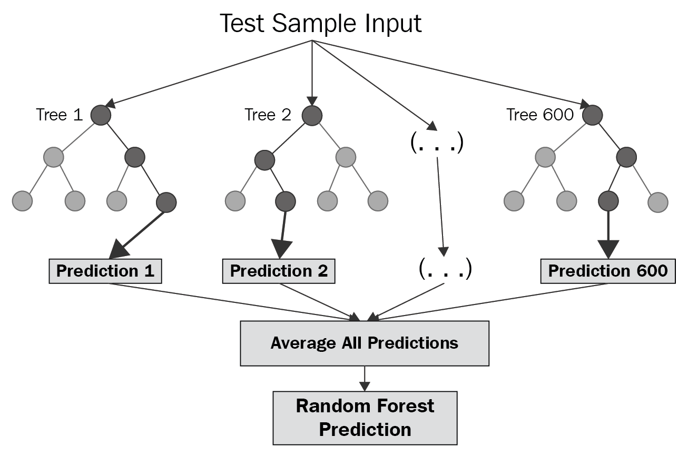

# The above figure very clearly explains that random forest algorithm is a collection of Decision trees and makes predictions based on the outcome of all the decision trees.

# Here is how each Decision tree will look like
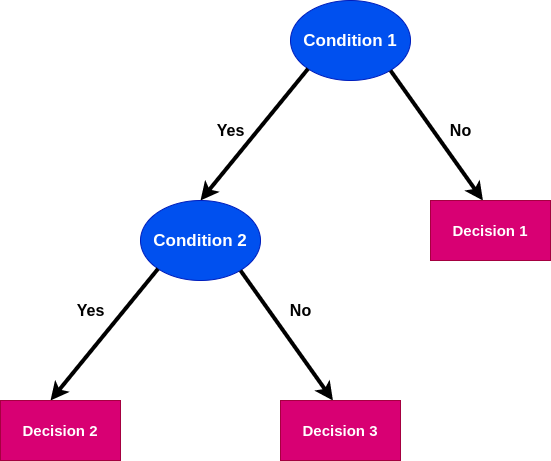

# Now let us make random forest classifier model

In [1]:
# Importing various libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Initial few steps will be same as that for Linear regression

In [2]:
# Import Data
df = pd.read_csv('Landslide_dataforlinearregression.csv')

In [3]:
df.head()

,Activity,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product
0,Active,Heavy rain,6750,60,70,0.8,56.0
1,Dormant,Heavy rain,1500,30,50,0.5,25.0
2,Dormant,Heavy rain,400,15,30,0.6,18.0
3,Reactivated,Heavy rain,450,18,40,0.5,20.0
4,Dormant,continous rainfall,200,10,25,0.4,10.0


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
X=df[['Activity','Trigger']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0
2,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0
4,1,0,0,0,1,0,0


In [6]:
df.head()

,Activity,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product
0,Active,Heavy rain,6750,60,70,0.8,56.0
1,Dormant,Heavy rain,1500,30,50,0.5,25.0
2,Dormant,Heavy rain,400,15,30,0.6,18.0
3,Reactivated,Heavy rain,450,18,40,0.5,20.0
4,Dormant,continous rainfall,200,10,25,0.4,10.0


In [7]:
df=pd.concat([df,X],axis=1)
df.head()


,Activity,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,Active,Heavy rain,6750,60,70,0.8,56.0,0,0,1,0,0,0,0
1,Dormant,Heavy rain,1500,30,50,0.5,25.0,1,0,1,0,0,0,0
2,Dormant,Heavy rain,400,15,30,0.6,18.0,1,0,1,0,0,0,0
3,Reactivated,Heavy rain,450,18,40,0.5,20.0,0,1,1,0,0,0,0
4,Dormant,continous rainfall,200,10,25,0.4,10.0,1,0,0,0,1,0,0


In [8]:
df.drop(['Activity'],axis=1)

,Trigger,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,Heavy rain,6750,60,70,0.80,56.0,0,0,1,0,0,0,0
1,Heavy rain,1500,30,50,0.50,25.0,1,0,1,0,0,0,0
2,Heavy rain,400,15,30,0.60,18.0,1,0,1,0,0,0,0
3,Heavy rain,450,18,40,0.50,20.0,0,1,1,0,0,0,0
4,continous rainfall,200,10,25,0.40,10.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,road cutting,700,17,15,1.00,15.0,0,1,0,0,0,0,1
97,road cutting,1500,27,30,0.79,23.7,0,0,0,0,0,0,1
98,road cutting,500,18,22,0.70,15.4,0,1,0,0,0,0,1
99,continous rainfall,500,14,22,0.70,15.4,1,0,0,0,1,0,0


In [9]:
df.drop(['Trigger'],axis=1)

,Activity,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,Active,6750,60,70,0.80,56.0,0,0,1,0,0,0,0
1,Dormant,1500,30,50,0.50,25.0,1,0,1,0,0,0,0
2,Dormant,400,15,30,0.60,18.0,1,0,1,0,0,0,0
3,Reactivated,450,18,40,0.50,20.0,0,1,1,0,0,0,0
4,Dormant,200,10,25,0.40,10.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Reactivated,700,17,15,1.00,15.0,0,1,0,0,0,0,1
97,Active,1500,27,30,0.79,23.7,0,0,0,0,0,0,1
98,Reactivated,500,18,22,0.70,15.4,0,1,0,0,0,0,1
99,Dormant,500,14,22,0.70,15.4,1,0,0,0,1,0,0


# Now since we have created dummies of avtivity and trigger we drop them from dataset

In [10]:
df.drop(['Activity'],axis=1,inplace=True)

In [11]:
df.drop(['Trigger'],axis=1,inplace=True)

In [12]:
df.head()

,Landslide Volume,Landslide predictability,Cummulative Rainfall,Rainfall Intensity,Product,Activity_Dormant,Activity_Reactivated,Trigger_Heavy rain,Trigger_Steep slope,Trigger_continous rainfall,Trigger_flooding,Trigger_road cutting
0,6750,60,70,0.8,56.0,0,0,1,0,0,0,0
1,1500,30,50,0.5,25.0,1,0,1,0,0,0,0
2,400,15,30,0.6,18.0,1,0,1,0,0,0,0
3,450,18,40,0.5,20.0,0,1,1,0,0,0,0
4,200,10,25,0.4,10.0,1,0,0,0,1,0,0


# Now dividing the dataset ito features which will be used for predicting and label which will be predicted.

# Also since random forest works array we convert dataset into arrays using numpy

In [13]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['Landslide predictability'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('Landslide predictability', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

# Now spilliting in train and test in 75:25 ratio and after using several standard random state values random state=42 was finallized as it was giving the best accuracy

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (75, 11)
Training Labels Shape: (75,)
Testing Features Shape: (26, 11)
Testing Labels Shape: (26,)


In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# In the above snippet we have trained the model and put n_estimators=1000 which means 1000 decision trees would be made before averaging the final prediction

# In the below Snippet we have predicted values using random forest model which we built and calculated the absolute errors

In [17]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'percent.')

Mean Absolute Error: 3.31 percent.


# Now since accuracy is defined in random forest model lets calculate the accuracy of our model.

In [18]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 85.74 %.


# A 85.74 % accuracy is quite good to make predictions.Lets just see which feature is holding the most importance so that we can have it in our input category for the model deployed in website.

In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rainfall Intensity   Importance: 0.5
Variable: Landslide Volume     Importance: 0.35
Variable: Landslide predictability Importance: 0.15
Variable: Cummulative Rainfall Importance: 0.0
Variable: Product              Importance: 0.0
Variable: Activity_Dormant     Importance: 0.0
Variable: Activity_Reactivated Importance: 0.0
Variable: Trigger_Heavy rain   Importance: 0.0
Variable: Trigger_Steep slope  Importance: 0.0
Variable: Trigger_continous rainfall Importance: 0.0
Variable: Trigger_flooding     Importance: 0.0


# so rainfall intensity comes out to be the most important variable from random forest classifier and product of cumullative rainfall and intensity was the most important in Linear Regression.So these two will be our main inputs when we deploy prediction model to website